### Objective:
To explore the dataset contain concert information and see if there are any interesting insights.
Hoping to update this soon! Open to ideas of what more can be done!

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
#Import the dataset
nyphil = pd.read_csv('ny_phil.csv')

D:\DS Tools\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Let's Explore the Dataset

In [3]:
nyphil.shape

(806179, 17)

In [4]:
nyphil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806179 entries, 0 to 806178
Data columns (total 17 columns):
Date                 806179 non-null object
Location             806179 non-null object
Time                 806179 non-null object
Venue                806179 non-null object
eventType            806179 non-null object
id                   806179 non-null object
composerName         737731 non-null object
conductorName        570894 non-null object
interval             68389 non-null object
movement             340598 non-null object
workTitle            737731 non-null object
soloistInstrument    779437 non-null object
soloistName          780096 non-null object
soloistRoles         779834 non-null object
season               781218 non-null object
programID            781218 non-null float64
orchestra            781218 non-null object
dtypes: float64(1), object(16)
memory usage: 104.6+ MB


In [29]:
nyphil.head()

,Date,Location,Time,Venue,eventType,id,composerName,conductorName,interval,movement,...,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra,Date2,Date3,year,month
0,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,...,Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,1842-12-07 05:00:00,1842-12-07,1842,12
1,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,...,Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,1842-12-07 05:00:00,1842-12-07,1842,12
2,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,...,Violin,"Hill, Ureli Corelli",A,1842-43,3853.0,New York Philharmonic,1842-12-07 05:00:00,1842-12-07,1842,12
3,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,...,Viola,"Derwort, G. H.",A,1842-43,3853.0,New York Philharmonic,1842-12-07 05:00:00,1842-12-07,1842,12
4,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,...,Cello,"Boucher, Alfred",A,1842-43,3853.0,New York Philharmonic,1842-12-07 05:00:00,1842-12-07,1842,12


#### Are there any missing values in the data?
From variable 'composerName' onward there seem to be missing values

In [5]:
nyphil.isnull().sum()

Date                      0
Location                  0
Time                      0
Venue                     0
eventType                 0
id                        0
composerName          68448
conductorName        235285
interval             737790
movement             465581
workTitle             68448
soloistInstrument     26742
soloistName           26083
soloistRoles          26345
season                24961
programID             24961
orchestra             24961
dtype: int64

In [6]:
#Convert the test to date format
nyphil['Date2'] = pd.to_datetime(nyphil['Date'],infer_datetime_format=True)
nyphil['Date3'] = nyphil['Date2'].dt.date
nyphil['year'] = nyphil['Date2'].dt.year
nyphil['month'] = nyphil['Date2'].dt.month

In [7]:
nyphil.columns

Index(['Date', 'Location', 'Time', 'Venue', 'eventType', 'id', 'composerName',
       'conductorName', 'interval', 'movement', 'workTitle',
       'soloistInstrument', 'soloistName', 'soloistRoles', 'season',
       'programID', 'orchestra', 'Date2', 'Date3', 'year', 'month'],
      dtype='object')

#### What are the different types of events

In [8]:
nyphil['eventType'].unique()

array(['Subscription Season', 'Special', 'Chamber', 'Tour',
       "Young People's Concert", 'Non-Subscription',
       'Pension Fund Benefit Concert', 'Runout', 'Private Concert', 'None',
       'Stadium Concert', 'Student Concert',
       "Young People's Concerts for Schools", 'Chamber Concert (Private)',
       'Festival', "World's Fair", 'Summer Broadcast Concert',
       'Carnegie Pop Concert', 'Pre-Concert Recital', 'Promenade', 'Parks',
       'Prospective Encounters', 'Informal Evening', 'Rug Concerts',
       'Strike Concerts', 'Tour - Chamber', 'Horizons',
       'St. John the Divine', 'Festival - Chamber', 'Rush Hour',
       'Saturday Matinee', 'Holiday Brass', 'Master Class',
       'Leinsdorf Lecture', 'Recording Session Only',
       "Tour - Young People's Concerts for Schools",
       'World Trade Center - Chamber', 'Borough Concerts',
       'Tour - Concert for Patrons', 'Summertime Classics', 'Lecture',
       "Very Young People's Concert", 'Inside the Music', 'Hear &

#### What is the historical trend of events?

In [9]:
year_events = nyphil.groupby('year')['programID'].nunique().reset_index(name="count")

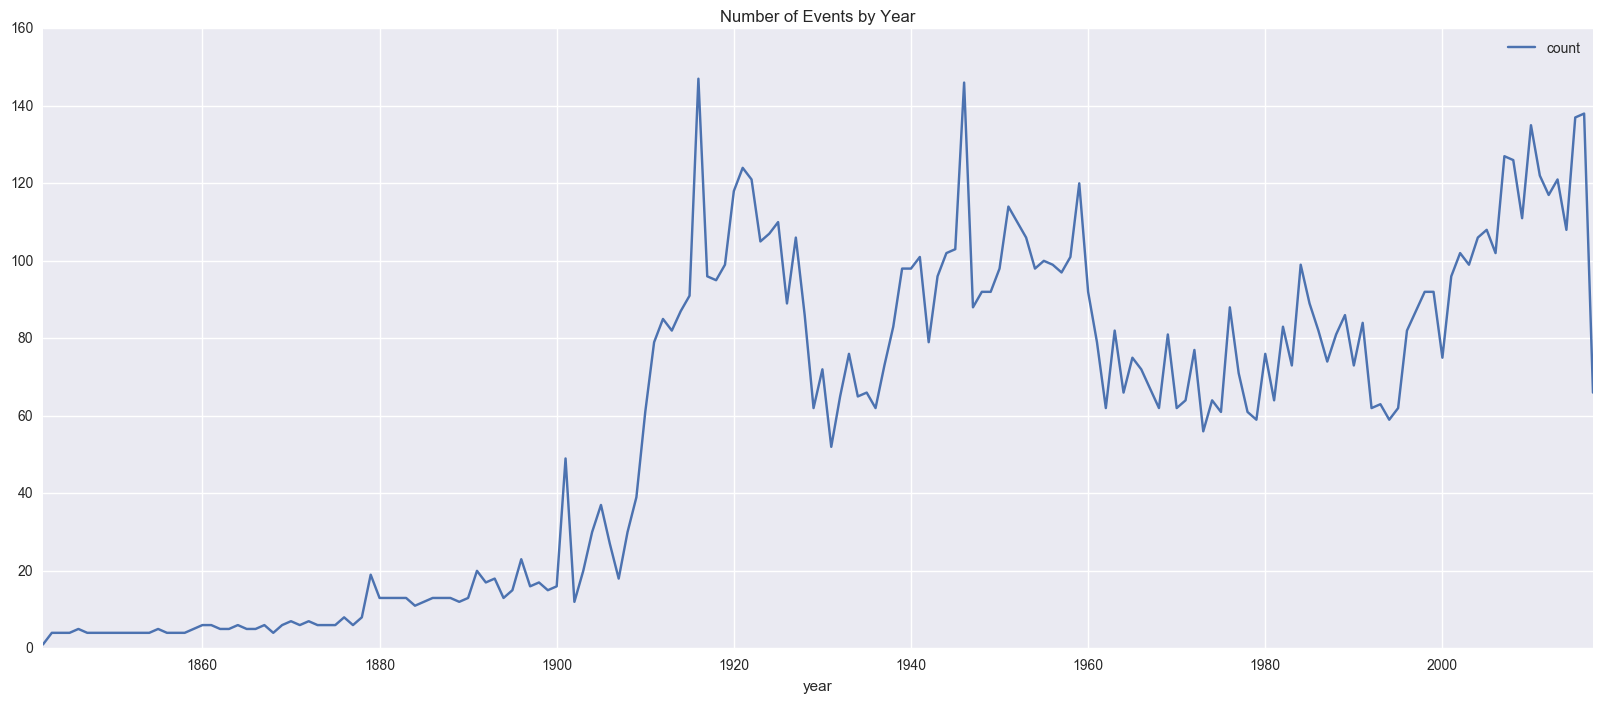

In [10]:
year_events.plot(x='year', figsize=[20,8], title='Number of Events by Year')

#### What are the popular types of events in 2016?

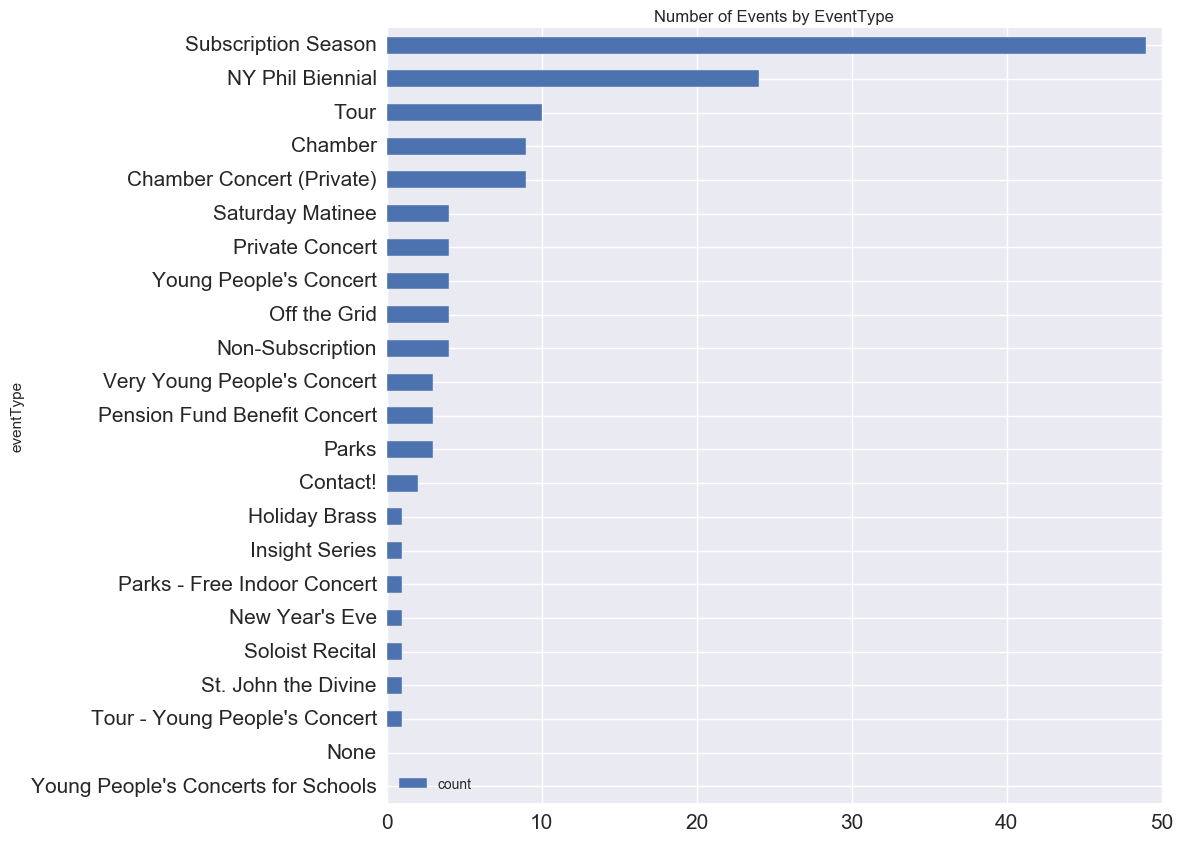

In [33]:
events = nyphil[nyphil['year']==2016].groupby('eventType')['programID'].nunique().reset_index(name="count").sort_values(by='count', ascending=True)
events.plot(kind='barh', x='eventType', y='count', figsize=[10,10], fontsize=15, title= 'Number of Events by EventType')

#### Which conductor had the most number of events in 2016?

In [17]:
conductor_events = nyphil[nyphil['year']==2016].groupby('conductorName')['programID'].nunique().reset_index(name="count").sort_values(by='count', ascending=True)

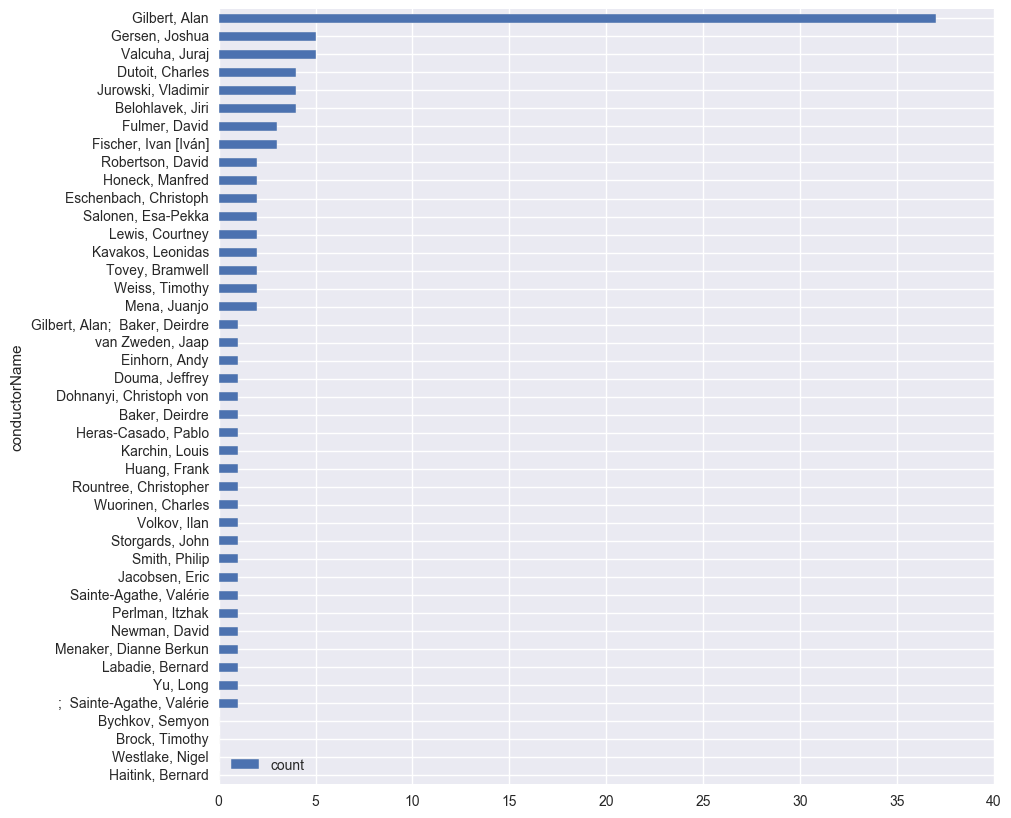

In [41]:
conductor_events.plot(kind='barh', x='conductorName', y='count', figsize=[10,10])

#### Which venue had the most number of events in 2016?

In [34]:
venue_events = nyphil[nyphil['year']==2016].groupby('Venue')['programID'].nunique().reset_index(name="count").sort_values(by='count', ascending=True)

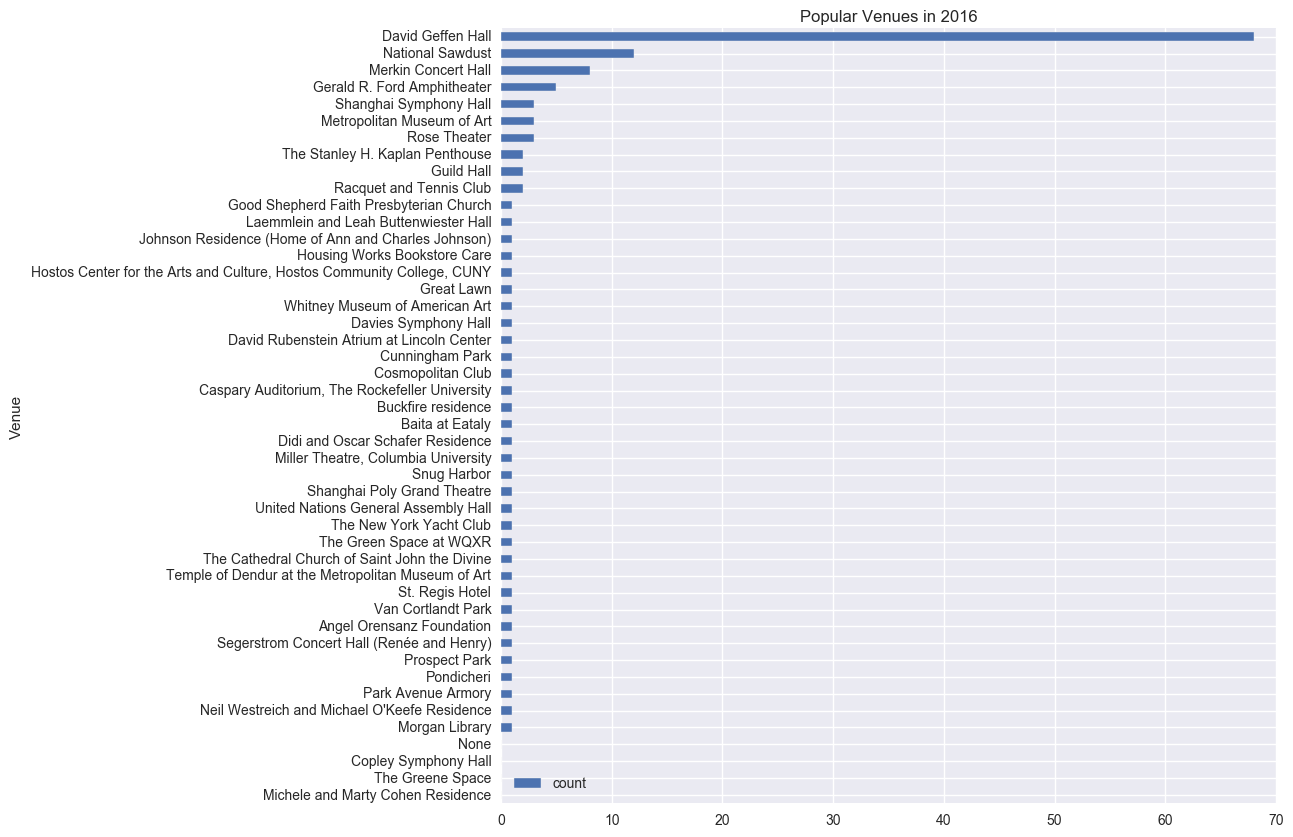

In [39]:
venue_events.plot(kind='barh', x='Venue', y='count', figsize=[10,10], title='Popular Venues in 2016')

#### Most popular composers across time
We count the unique programIDs for each composer.


In [19]:
composer_count = nyphil.groupby('composerName')['programID'].nunique().reset_index(name="count").sort_values(by='count', ascending=True)

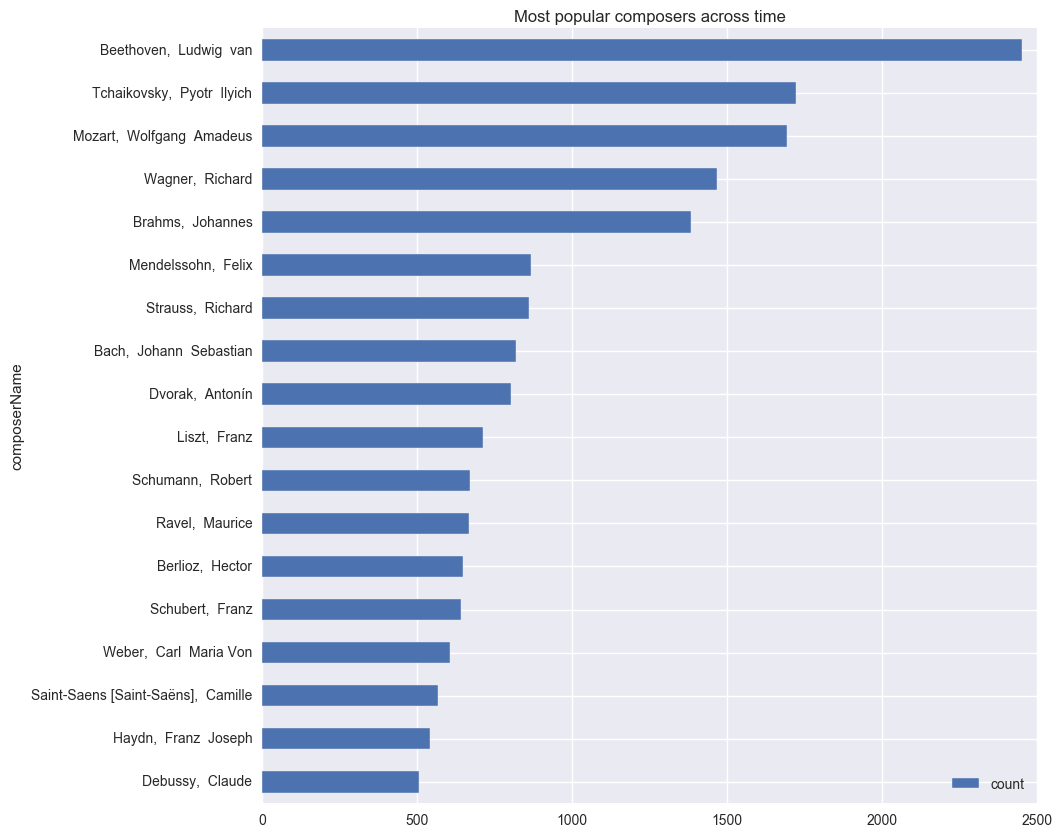

In [40]:
composer_count[composer_count['count']>500].plot(kind='barh', x='composerName', y='count', figsize=[10,10], 
                                                 title='Most popular composers across time')